In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
house_prices_df = pd.read_csv(r"C:\Users\basde\Downloads\les24_bestanden\pp-2021.csv",
sep = ';',usecols=[0,2,3,4],
names=["price","postcode","type","new"])
house_prices_df.head(10)

,price,postcode,type,new
0,70000,HX2 8SN,T,N
1,150000,LS27 9AL,O,N
2,430000,LS6 1BU,D,N
3,135000,LS10 1LP,F,N
4,131000,HD2 2SN,O,N
5,180000,LS10 1NG,F,N
6,65000,HD4 6DL,O,N
7,180000,LS10 1NW,O,N
8,60000,BD4 7EJ,T,N
9,255000,BD10 0QZ,O,N


In [3]:
postcodes_df = pd.read_csv(r"C:\Users\basde\Downloads\les24_bestanden\ukpostcodes.csv",usecols=[1,2,3])
postcodes_df.head()

,postcode,latitude,longitude
0,AB10 1XG,57.144156,-2.114864
1,AB10 6RN,57.137871,-2.121487
2,AB10 7JB,57.124274,-2.127206
3,AB11 5QN,57.142701,-2.093295
4,AB11 6UL,57.137468,-2.112455


In [4]:
df = house_prices_df.merge(postcodes_df,how='inner',left_on='postcode',right_on='postcode')
df['price'] = df['price'] / 1000
df.head()

,price,postcode,type,new,latitude,longitude
0,70.0,HX2 8SN,T,N,53.751998,-1.911823
1,150.0,LS27 9AL,O,N,53.741682,-1.597777
2,430.0,LS6 1BU,D,N,53.816872,-1.572433
3,135.0,LS10 1LP,F,N,53.790118,-1.532192
4,131.0,HD2 2SN,O,N,53.664273,-1.794084


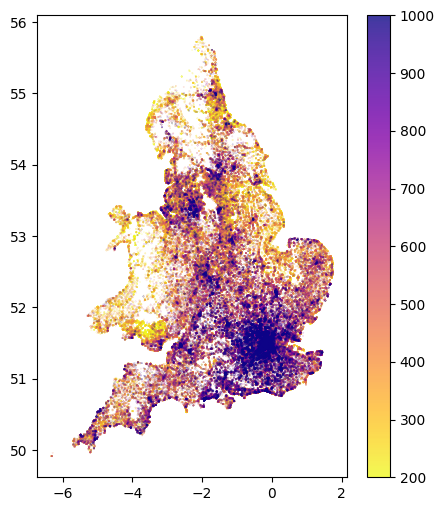

In [6]:
def visualise(df, vmin, vmax):
    df_sorted = df.sort_values(by='price')
    x = df_sorted['longitude']
    y = df_sorted['latitude']
    c = df_sorted['price']
    plt.rcParams['figure.figsize'] = [5, 6]
    plt.rcParams['figure.dpi'] = 100
    plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r',
    norm=colors.Normalize(vmin=vmin,vmax=vmax), alpha=0.8)
    plt.colorbar()
    plt.show()
visualise(df, 200, 1000)

In [7]:
# Terraced houses only (i.e., Townhouses in the US)
prices_df = df[(df['type'] == 'T')]
# Obtain the average price paid in each postcode
prices_df = prices_df.groupby(["postcode","latitude","longitude"], as_index=False)["price"].mean()
prices_df.head()

,postcode,latitude,longitude,price
0,AL1 1AS,51.749073,-0.335471,608.75
1,AL1 1DQ,51.747408,-0.342340,416.00
2,AL1 1HW,51.747071,-0.336506,505.00
3,AL1 1LN,51.748754,-0.333208,500.00
4,AL1 1NF,51.749499,-0.336918,680.00


In [8]:
X = prices_df[['latitude','longitude']]
y = prices_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
k=7
model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
model.fit(X_train.values, y_train.values)
print(model.score(X_test.values,y_test.values))
model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
model.fit(X_train.values, y_train.values)
print(model.score(X_train.values,y_train.values))

0.7127792223984843
0.7084783997642454


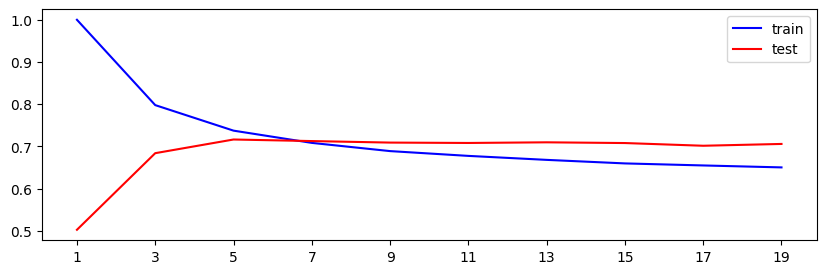

In [24]:
train = []
test = []
r = range (1,21,2)

for k in r:
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    test.append(model.score(X_test.values,y_test.values))
    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    train.append(model.score(X_train.values,y_train.values))
    
train = np.array(train)
test = np.array(test)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,train,label='train',color='blue')
plt.plot(r,test,label='test',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()